In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [2]:
df_train = pd.read_csv("twitter_training.csv",names=['Tweet_Id','Company','Sentiments','Tweets'])
df_train.head()

,Tweet_Id,Company,Sentiments,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df_val = pd.read_csv("twitter_validation.csv",names=['Tweet_Id','Company','Sentiments','Tweets'])
df_val.head()

,Tweet_Id,Company,Sentiments,Tweets
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_Id    74682 non-null  int64 
 1   Company     74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Tweets      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet_Id    1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Sentiments  1000 non-null   object
 3   Tweets      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


### Null Value check

In [6]:
df_train.isnull().sum()

Tweet_Id        0
Company         0
Sentiments      0
Tweets        686
dtype: int64

In [7]:
df_val.isnull().sum()

Tweet_Id      0
Company       0
Sentiments    0
Tweets        0
dtype: int64

### Count of categorical columns

In [8]:
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        print(df_train[col].value_counts())
        print("------------------------------")

Company
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)       

In [9]:
for col in df_val.columns:
    if df_val[col].dtypes == 'object':
        print(df_val[col].value_counts())
        print("------------------------------")

Company
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                           

### Duplicates

In [10]:
df_train.duplicated().sum()

2700

In [11]:
df_val.duplicated().sum()

0

### Dropping Missing values

In [12]:
df_train.dropna(inplace=True)

In [13]:
df_train.isnull().sum()

Tweet_Id      0
Company       0
Sentiments    0
Tweets        0
dtype: int64

### Dropping Duplicates

In [14]:
df_train.drop_duplicates(keep='first',inplace=True)

In [15]:
df_train.duplicated().sum()

0

In [16]:
df_train.shape

(71656, 4)

In [17]:
df_val.shape

(1000, 4)

### Dropping columns Tweet Id

In [18]:
df_train.drop('Tweet_Id',axis=1,inplace=True)
df_val.drop('Tweet_Id',axis=1,inplace=True)

In [19]:
df_train.head(2)

,Company,Sentiments,Tweets
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...


In [20]:
import seaborn as sns

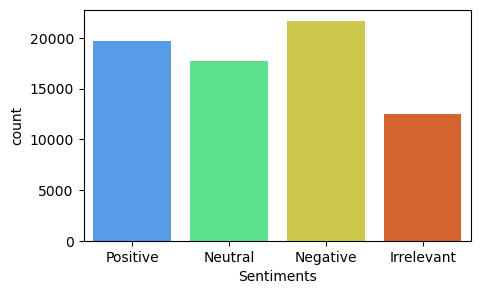

In [21]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sentiments',data=df_train,palette='turbo')   # palette="gnuplot"
plt.show()

In [22]:
df_train['Tweets']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: Tweets, Length: 71656, dtype: object

In [23]:
df_train['Tweets'][74678]

"Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice"

<Axes: xlabel='Company'>

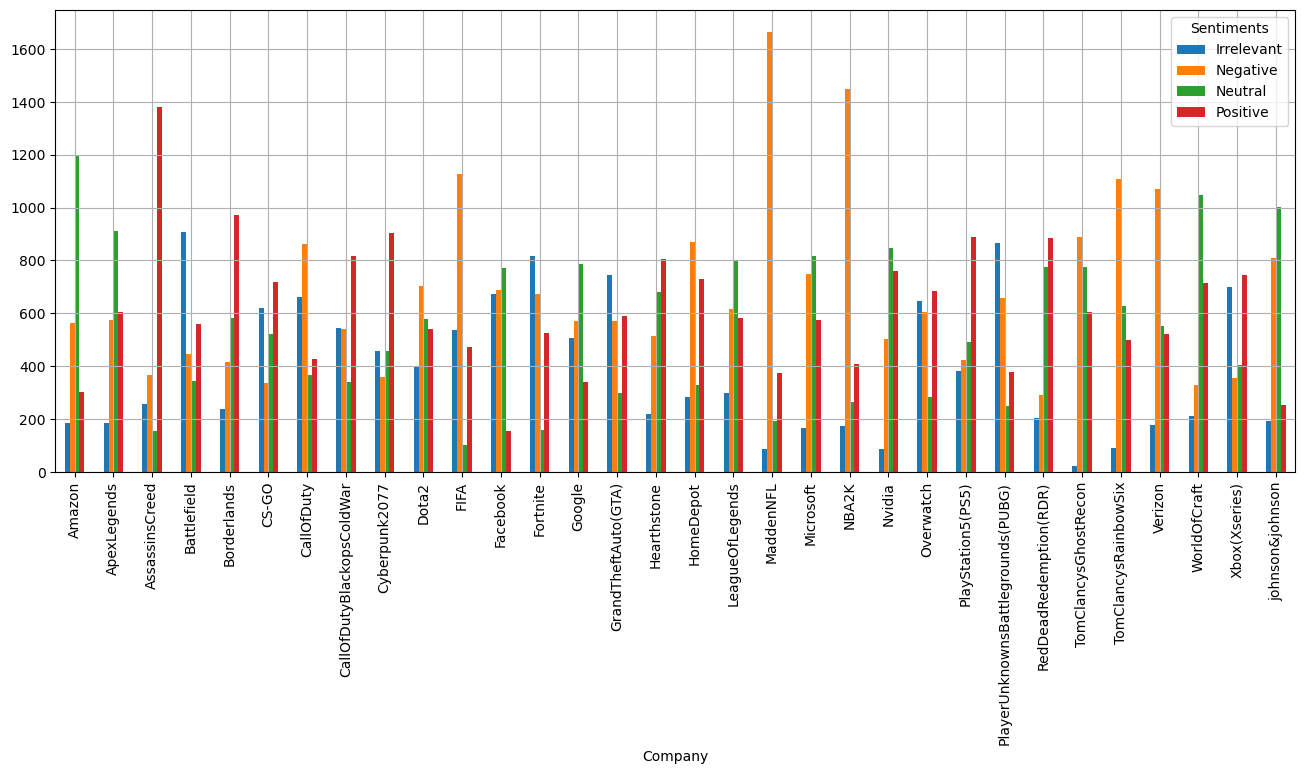

In [24]:
comp_sentiment = pd.crosstab(df_train['Company'],df_train['Sentiments'])
comp_sentiment.plot(kind='bar', figsize=(16, 6),grid=True)

### Data Pre-Processing

In [25]:
import nltk
import re
import string
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [200]:
"""nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def text_cleaner(text):
    text = text.lower()
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = text.strip()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text"""

"nltk.download('stopwords')\nstop_words = set(stopwords.words('english'))\n\ndef text_cleaner(text):\n    text = text.lower()\n    text = re.sub(r'unk' , ' ' , text)\n    text = re.sub('\n', '', text)\n    text = re.sub(r'[^a-z\\s]', '', text)\n    text = text.strip()\n    text = ' '.join(word for word in text.split() if word not in stop_words)\n    return text"

### Lower Case Conversion

In [26]:
df_train['Tweets'] = df_train['Tweets'].str.lower()
#df_val['Tweets'] = df_val['Tweets'].str.lower()

### Removing Stopwords

In [27]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation) 

In [28]:
df_train['Tweets'] = df_train['Tweets'].apply(lambda x: [item for item in x.split() if item not in stopwords]).apply(lambda x:" ".join(x))
#df_val['Tweets'] = df_val['Tweets'].apply(lambda x: [item for item in x.split() if item not in stopwords]).apply(lambda x:" ".join(x))

In [29]:
df_train.head()

,Company,Sentiments,Tweets
0,Borderlands,Positive,im getting borderlands murder
1,Borderlands,Positive,"coming borders kill all,"
2,Borderlands,Positive,"im getting borderlands kill all,"
3,Borderlands,Positive,"im coming borderlands murder all,"
4,Borderlands,Positive,"im getting borderlands 2 murder all,"


In [30]:
df_train['Tweets'][74678]

'realized mac window partition 6 years behind nvidia drivers idea notice'

In [31]:
df_train['Tweets'][1]

'coming borders kill all,'

In [32]:
df_train['Tweets'] = df_train['Tweets'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
# df_val['Tweets'] = df_val['Tweets'].str.replace('[^\w\s]','')

In [33]:
df_train['Tweets'][1]

'coming borders kill all,'

In [34]:
df_train['Tweets'][74678]

'realized mac window partition 6 years behind nvidia drivers idea notice'

In [35]:
exclude = string.punctuation

In [36]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [37]:
df_train['Tweets'] = df_train['Tweets'].apply(remove_punc)
# df_val['Tweets'] = df_val['Tweets'].apply(remove_punc1)

In [38]:
df_train['Tweets'][74678]

'realized mac window partition 6 years behind nvidia drivers idea notice'

### Removing Unwanted Characters

In [39]:
def clean_data(text):
    text = re.sub(r'<.*?>','',text)    # Remove html tags
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+','',text)   # Remove URL's
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    #text = re.sub(r'[^\w\s]','')
    # word = nltk.word_tokenize(text)
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text
    
    

In [40]:
df_train['Tweets'] = df_train['Tweets'].apply(clean_data)
# df_val['Tweets'] = df_val['Tweets'].apply(clean_data)

In [41]:
df_train['Tweets'][74678]

'realized mac window partition years behind nvidia drivers idea notice'

### Stemming

In [42]:
from nltk.stem import PorterStemmer

In [43]:
st = PorterStemmer()
df_train['Tweets'] = df_train['Tweets'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
# df_val['Tweets'] = df_val['Tweets'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [44]:
df_train['Tweets'][74678]

'realiz mac window partit year behind nvidia driver idea notic'

In [45]:
df_train['Tweets'][10]

'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pictwittercommlsi wf jg'

In [46]:
df_train.isnull().sum()

Company       0
Sentiments    0
Tweets        0
dtype: int64

In [47]:
len(df_train['Tweets'])


71656

In [48]:
df_train.shape

(71656, 3)

In [49]:
df_trainNew = df_train.iloc[:10000]
df_trainNew.shape

(10000, 3)

In [ ]:
#vdf_valnew = df_val.iloc[:]

### Text Vectorization Using TF-IDF

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer()
train_tfidf = tfidf.fit_transform(df_trainNew['Tweets']).toarray()
                
                
#train_tfidf = ((tfidf.fit_transform(df_train['Tweets'])).astype(dtype='uint8')).toarray()

# val_tfidf = tfidf.transform(df_val['Tweets']).toarray()

In [53]:
print(train_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
# train_tfidf = train_tfidf.iloc[:40000]

In [55]:
# print(val_tfidf)

In [56]:
train_tfidf.shape

(10000, 8090)

In [230]:
# val_tfidf.shape

(1000, 30455)

In [57]:
feature_names = tfidf.get_feature_names_out()

In [58]:
print(feature_names.shape)

(8090,)


In [60]:
vect_dfTrain = pd.DataFrame(train_tfidf,columns=tfidf.get_feature_names_out())
vect_dfTrain.head()

,aa,aaaahhh,aall,ab,abandon,abb,abba,abbi,abbott,abduct,...,zxxxvidsspac,zxxxvidsspacepphph,zxxxvispac,zy,zyfapoihpi,zynk,zz,zzgi,zzmhpax,zzmhpaxzo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
vect_dfTrain.shape

(10000, 8090)

### Model Building

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [63]:
X = vect_dfTrain
y = df_trainNew['Sentiments']

In [64]:
X.shape, y.shape

((10000, 8090), (10000,))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
X_train.shape, X_test.shape

((8000, 8090), (2000, 8090))

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier(n_estimators=200,n_jobs=1,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [70]:
ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)

In [71]:
y_test[:5]

6514     Neutral
4910     Neutral
1793    Positive
4969     Neutral
4736    Positive
Name: Sentiments, dtype: object

In [72]:
ypred_test[:5]

array(['Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive'],
      dtype=object)

In [73]:
ypred_train[:5]

array(['Neutral', 'Positive', 'Positive', 'Negative', 'Positive'],
      dtype=object)

In [74]:
# Accuracy of the Train and Test data

print("Accuracy Score for Training Data is: ", rf.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", rf.score(X_test, y_test))

Accuracy Score for Training Data is:  0.97725
Accuracy Score for Test Data is:  0.9235


In [77]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

  Irrelevant       0.95      0.87      0.91       363
    Negative       0.97      0.91      0.94       450
     Neutral       0.85      0.96      0.90       496
    Positive       0.94      0.93      0.94       691

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

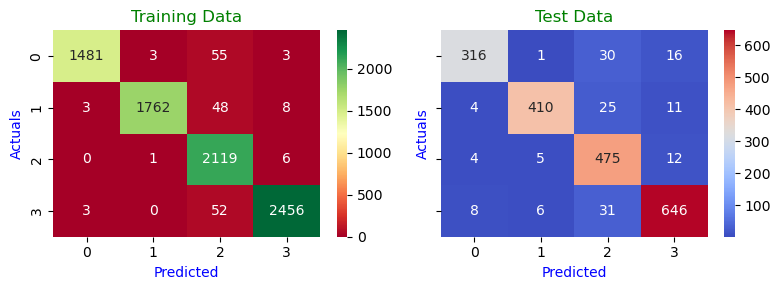

In [80]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((confusion_matrix(y_train,ypred_train)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((confusion_matrix(y_test,ypred_test)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()